# Bikeshare model

Our goal is to predict the total number of bike rides for a whole day given
* Forecasted max temperature
* The month (January - December)
* Is today a weekend?
* Is today a holiday?

## Prepare for ML training

Load CSV and split for training and testing

In [1]:
import pandas as pd

daily_rides = pd.read_csv('bikeshare.csv', parse_dates=True, index_col='date')
daily_rides.head()

,max_temp,month,holiday,weekend,n_rides
date,,,,,
2015-05-31,83.0,May,False,True,469
2015-06-01,56.0,June,False,False,113
2015-06-02,63.0,June,False,False,139
2015-06-03,71.0,June,False,False,131
2015-06-04,78.0,June,False,False,207


Here we see that there is a correlation between the predicted maximum temperature and the number of bike rides.

<AxesSubplot:xlabel='max_temp', ylabel='n_rides'>

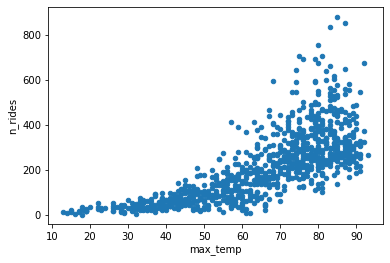

In [2]:
%matplotlib inline

daily_rides.plot.scatter(x='max_temp', y='n_rides')

Here `month` is treated as a categorical and the timeseries nature of the training data is ignored.

In [3]:
from sklearn.model_selection import train_test_split

X = daily_rides.drop(columns='n_rides')
y = daily_rides['n_rides']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=daily_rides['weekend'])

## Train a Random Forest model

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

The column transformer is important so that we can easily transform the raw input data as a Pandas DataFrame.

In [5]:
process = ColumnTransformer(
    transformers = [
        ('categorical', OneHotEncoder(categories='auto'), ['month']),
        ('numerical', MinMaxScaler(), ['max_temp']),
        ('boolean', 'passthrough', ['weekend', 'holiday'])
    ])

reg = GradientBoostingRegressor(n_estimators=800,
                                validation_fraction=0.2,
                                n_iter_no_change=5, tol=0.01)

pipe = make_pipeline(process, reg)

In [6]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(), ['month']),
                                                 ('numerical', MinMaxScaler(),
                                                  ['max_temp']),
                                                 ('boolean', 'passthrough',
                                                  ['weekend', 'holiday'])])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(n_estimators=800, n_iter_no_change=5,
                                           tol=0.01,
                                           validation_fraction=0.2))])

In [7]:
train_score = pipe.score(X_train, y_train)
test_score = pipe.score(X_test, y_test)

print(f'Train score: {train_score:.3f}')
print(f'Test score : {test_score:.3f}')

Train score: 0.747
Test score : 0.698


## Save the model

Now that the model has been fit we'll save it to disk to use in our prediction engine.

In [8]:
import joblib

joblib.dump(pipe, 'model.pkl')

['model.pkl']

### Challenge

Can you build a better model? Would it help to gridsearch over the parameters?

In [9]:
# Your code here